Data Validation

The data set consists of 1990 rows and 8 columns. The data was collected over the past year from various clinics and hospitals across the country on a random date for each clinic. 

- clinic_id: A unique identifier for each clinic, represented as an integer without any missing values. 
- ownership: The ownership type of each medical facility, represented as a categorical variable with three possible values: Profit, Non-Profit, and Public. The data matches the data dictionary and has no missing values, but there is a typo in the "non_profitt" category that needs to be corrected.
- hospital_location: The location type of each medical facility, represented as a categorical variable with two possible values: Urban and Rural. The data matches the data dictionary and has no missing values, but it may be beneficial to further filter this column for consistency and accuracy.
- admitted_patients: The number of patients admitted to each medical facility on a given day, represented as a discrete variable with any positive integer value. The data matches the data dictionary and has no missing values.
- nurse_patient_ratio: The ratio of nurses to patients, represented as a continuous variable with values ranging from 0.0 to 1.0. The data matches the data dictionary and has no missing values.
- ed_visits: The number of emergency department visits during a given day, represented as a discrete variable with some negative integer values. It is recommended to filter out the negative values for consistency and accuracy.
- satisfaction_score: The satisfaction score given by patients about their experience, represented as a continuous variable with values ranging from 1 to 10. The data has 159 missing values that will need to be addressed before analysis.
- revenue: The daily revenue value generated by each medical facility, represented as a continuous variable with any positive value to two decimal places. The data matches the data dictionary and has no missing values.


In [117]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
sns.set(style="ticks", color_codes=True)

In [118]:
# load data
df = pd.read_csv('./health_revenue.csv')
df.head()

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,Profit,Urban,23,0.40,12,2.04,55684.18
1,422,Profit,Urban,22,0.60,11,2.77,117115.85
2,1843,Public,Rural,47,0.37,31,3.13,72794.56
3,14,Non-Profit,Urban,20,0.06,47,1.30,87447.23
4,1880,Public,Rural,33,0.94,40,5.90,88848.01


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


In [120]:
#validate any negative values in numeric variables and nulls in count
df.describe()

,clinic_id,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1990.000000,1990.000000,1990.000000,1990.000000,1831.000000,1990.000000
mean,997.214070,25.400503,0.503251,23.250251,4.515418,88076.974523
std,577.514303,14.144905,0.285727,16.373214,2.753724,29644.679778
min,0.000000,1.000000,0.000000,-49.000000,1.000000,16432.280000
25%,491.250000,14.000000,0.250000,11.000000,2.190000,65186.840000
50%,1003.000000,25.000000,0.500000,24.000000,3.440000,88086.915000
75%,1497.750000,38.000000,0.750000,36.000000,7.110000,110556.667500
max,1989.000000,49.000000,1.000000,49.000000,9.990000,156115.420000


In [121]:
# Using pandas methods to select numeric variables, string variables and missing values
numeric = df.select_dtypes('number').columns
print('Number of numeric columns is {}'.format(numeric.shape[0]),'\n')
missing_num = df[numeric].isna().sum()
print('There are {} columns with missing values. Columns with missing values and number of missing values are:\n{}'.format(len(missing_num[missing_num > 0]),missing_num[missing_num > 0]),'\n')
missing_num_names = missing_num[missing_num > 0].keys()

strings = df.select_dtypes('object').columns
print('Number of string columns is {}'.format(strings.shape[0]),'\n')
missing_str = df[strings].isna().sum()
print('There are {} columns with missing values. Columns with missing values and number of missing values are:\n{}'.format(len(missing_str[missing_str > 0]),missing_str[missing_str > 0]))

Number of numeric columns is 6 

There are 1 columns with missing values. Columns with missing values and number of missing values are:
satisfaction_score    159
dtype: int64 

Number of string columns is 2 

There are 0 columns with missing values. Columns with missing values and number of missing values are:
Series([], dtype: int64)


In [122]:
print(df['ed_visits'].where(df['ed_visits'] < 0).count())
# df['ed_visits'] = np.where(df['ed_visits'] < 0, 0, df['ed_visits'])
# df['ed_visits'] = df['ed_visits'].abs()
# filter out negative values
df= df[df['ed_visits']>=0]

59


In [123]:
# Replace missing values with median
df['satisfaction_score'] = df['satisfaction_score'].fillna(np.median(df['satisfaction_score'].dropna()))
# df['satisfaction_score'] = pd.cut(df['satisfaction_score'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# df['satisfaction_score'] = np.round(df['satisfaction_score'])


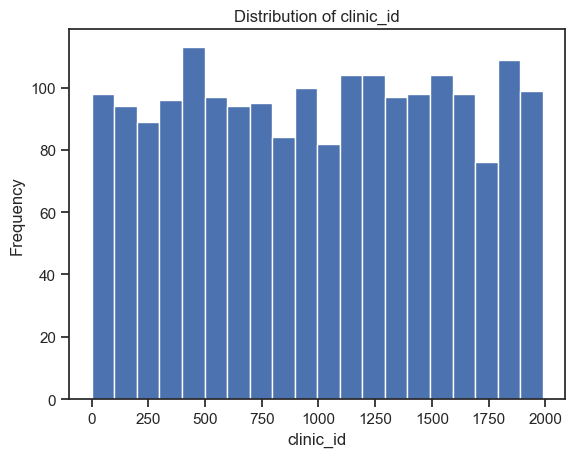

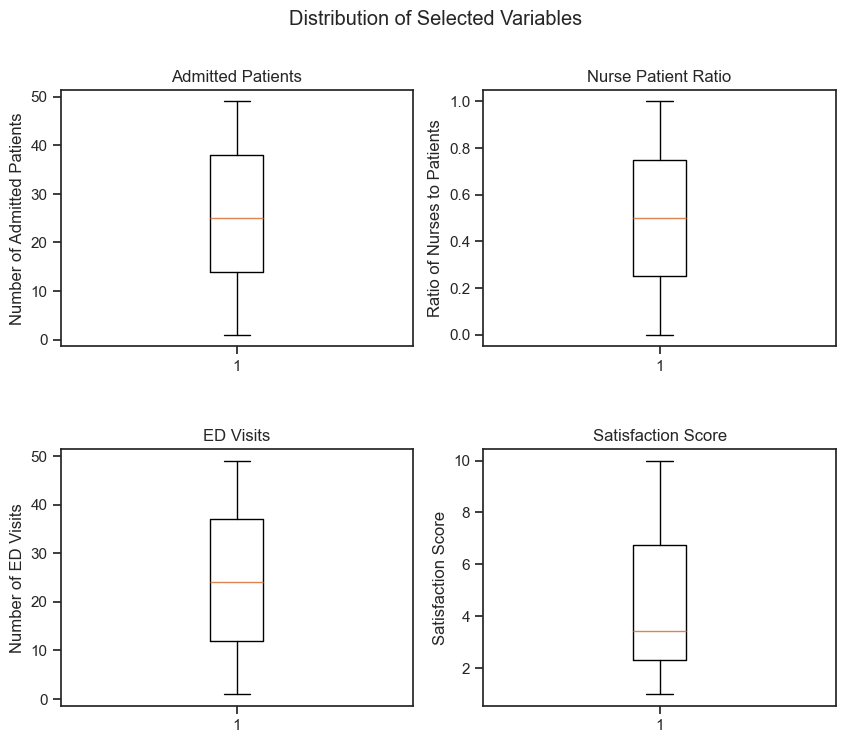

In [124]:

# Creating a histogram for clinic_id variable
plt.hist(df['clinic_id'], bins = 20)
plt.title('Distribution of clinic_id')
plt.xlabel('clinic_id')
plt.ylabel('Frequency')
plt.show()

# Creating subplots for each variable's boxplot

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of Selected Variables')

# Boxplot 1: admitted_patients
axs[0, 0].boxplot(df['admitted_patients'])
axs[0, 0].set_title('Admitted Patients')
axs[0, 0].set_ylabel('Number of Admitted Patients')

# Boxplot 2: nurse_patient_ratio
axs[0, 1].boxplot(df['nurse_patient_ratio'])
axs[0, 1].set_title('Nurse Patient Ratio')
axs[0, 1].set_ylabel('Ratio of Nurses to Patients')

# Boxplot 3: ed_visits
axs[1, 0].boxplot(df['ed_visits'])
axs[1, 0].set_title('ED Visits')
axs[1, 0].set_ylabel('Number of ED Visits')

# Boxplot 4: satisfaction_score
axs[1, 1].boxplot(df['satisfaction_score'])
axs[1, 1].set_title('Satisfaction Score')
axs[1, 1].set_ylabel('Satisfaction Score')

# Adjust the spaces between each subplot
fig.subplots_adjust(hspace=0.4)

plt.show()

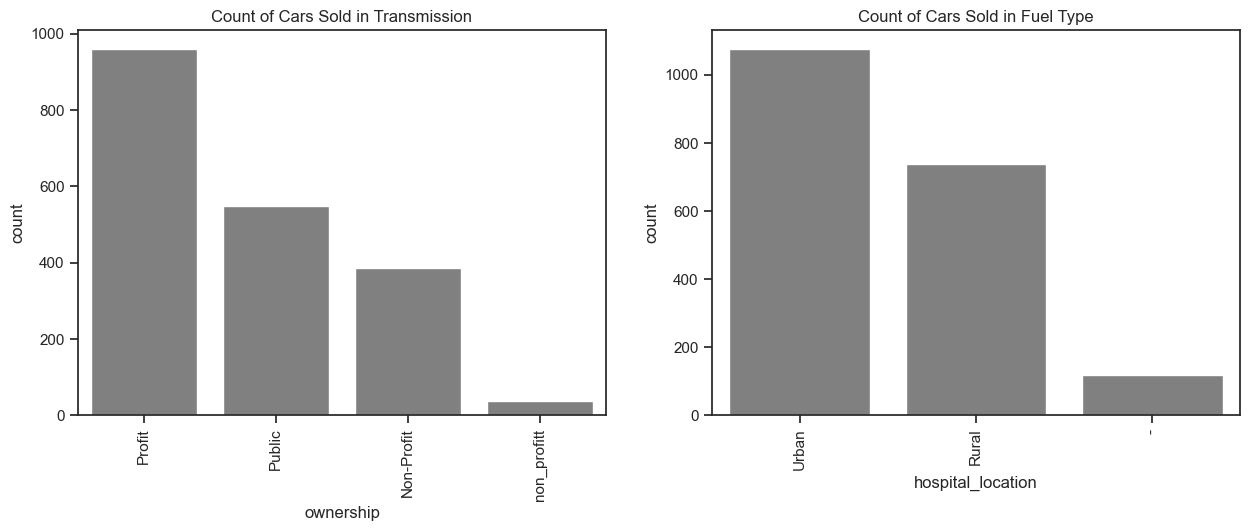

In [125]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['ownership'],color='gray',ax=axes[0]).set(title='Count of Cars Sold in Transmission')
sns.countplot(x=df['hospital_location'],color='gray',ax=axes[1]).set(title='Count of Cars Sold in Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:2745: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_74900\2163310102.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gray'` for the same effect.

  sns.catplot(x="ownership", y="revenue", data=df, kind="bar", ax=axes[0], color='gray',hue='hospital_location', estimator=sum)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:2745: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


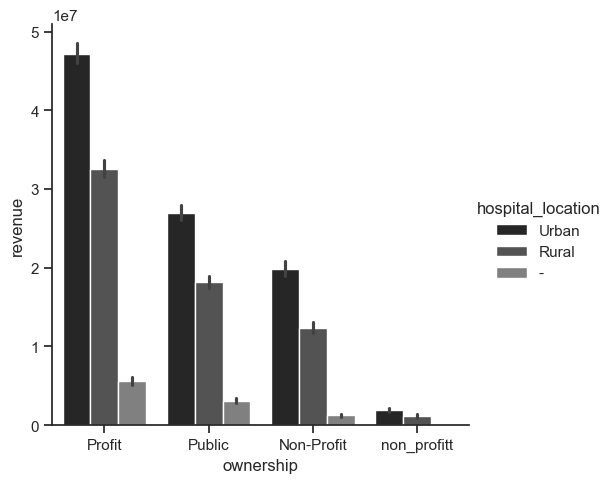

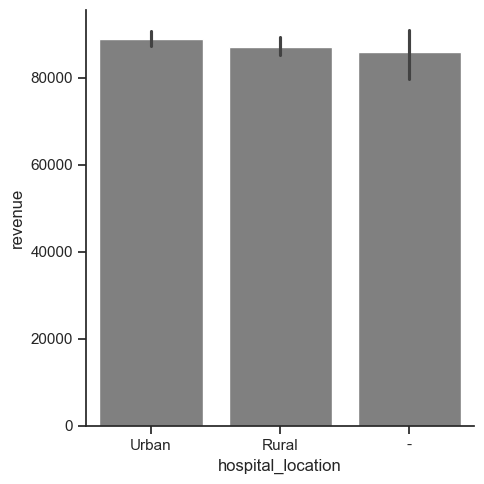

In [126]:
sns.catplot(x="ownership", y="revenue", data=df, kind="bar", ax=axes[0], color='gray',hue='hospital_location', estimator=sum)
axes[0].set_title('Revenue by Ownership')

# Bar chart with hospital location data
sns.catplot(x="hospital_location", y="revenue", data=df, kind="bar", ax=axes[1], color='gray')
axes[1].set_title('Revenue by Location')

plt.tight_layout()
plt.show()


In [127]:
df.columns

Index(['clinic_id', 'ownership', 'hospital_location', 'admitted_patients',
       'nurse_patient_ratio', 'ed_visits', 'satisfaction_score', 'revenue'],
      dtype='object')

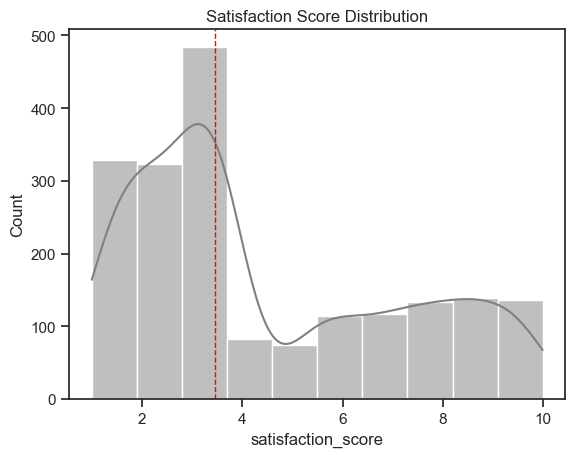

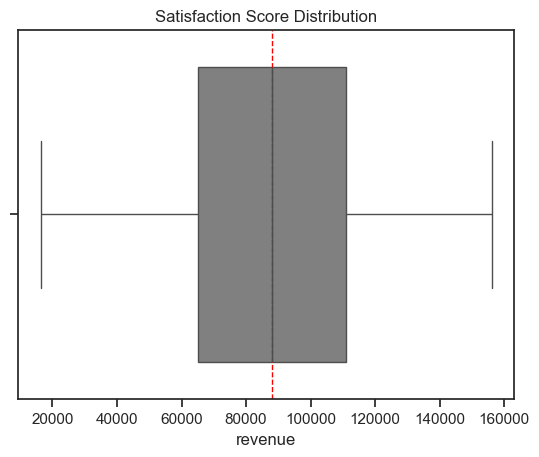

In [128]:
# Pltting a scatterplot for admitted_patients and revenue
sns.histplot(x="satisfaction_score", data=df, color='gray', bins=10, kde=True).set(title='Satisfaction Score Distribution')
plt.axvline(df['satisfaction_score'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()
plt.show()
# Plotting a boxplot for admitted_patients and revenue
sns.boxplot(x="revenue", data=df, color='gray').set(title='Satisfaction Score Distribution')
plt.axvline(df['revenue'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

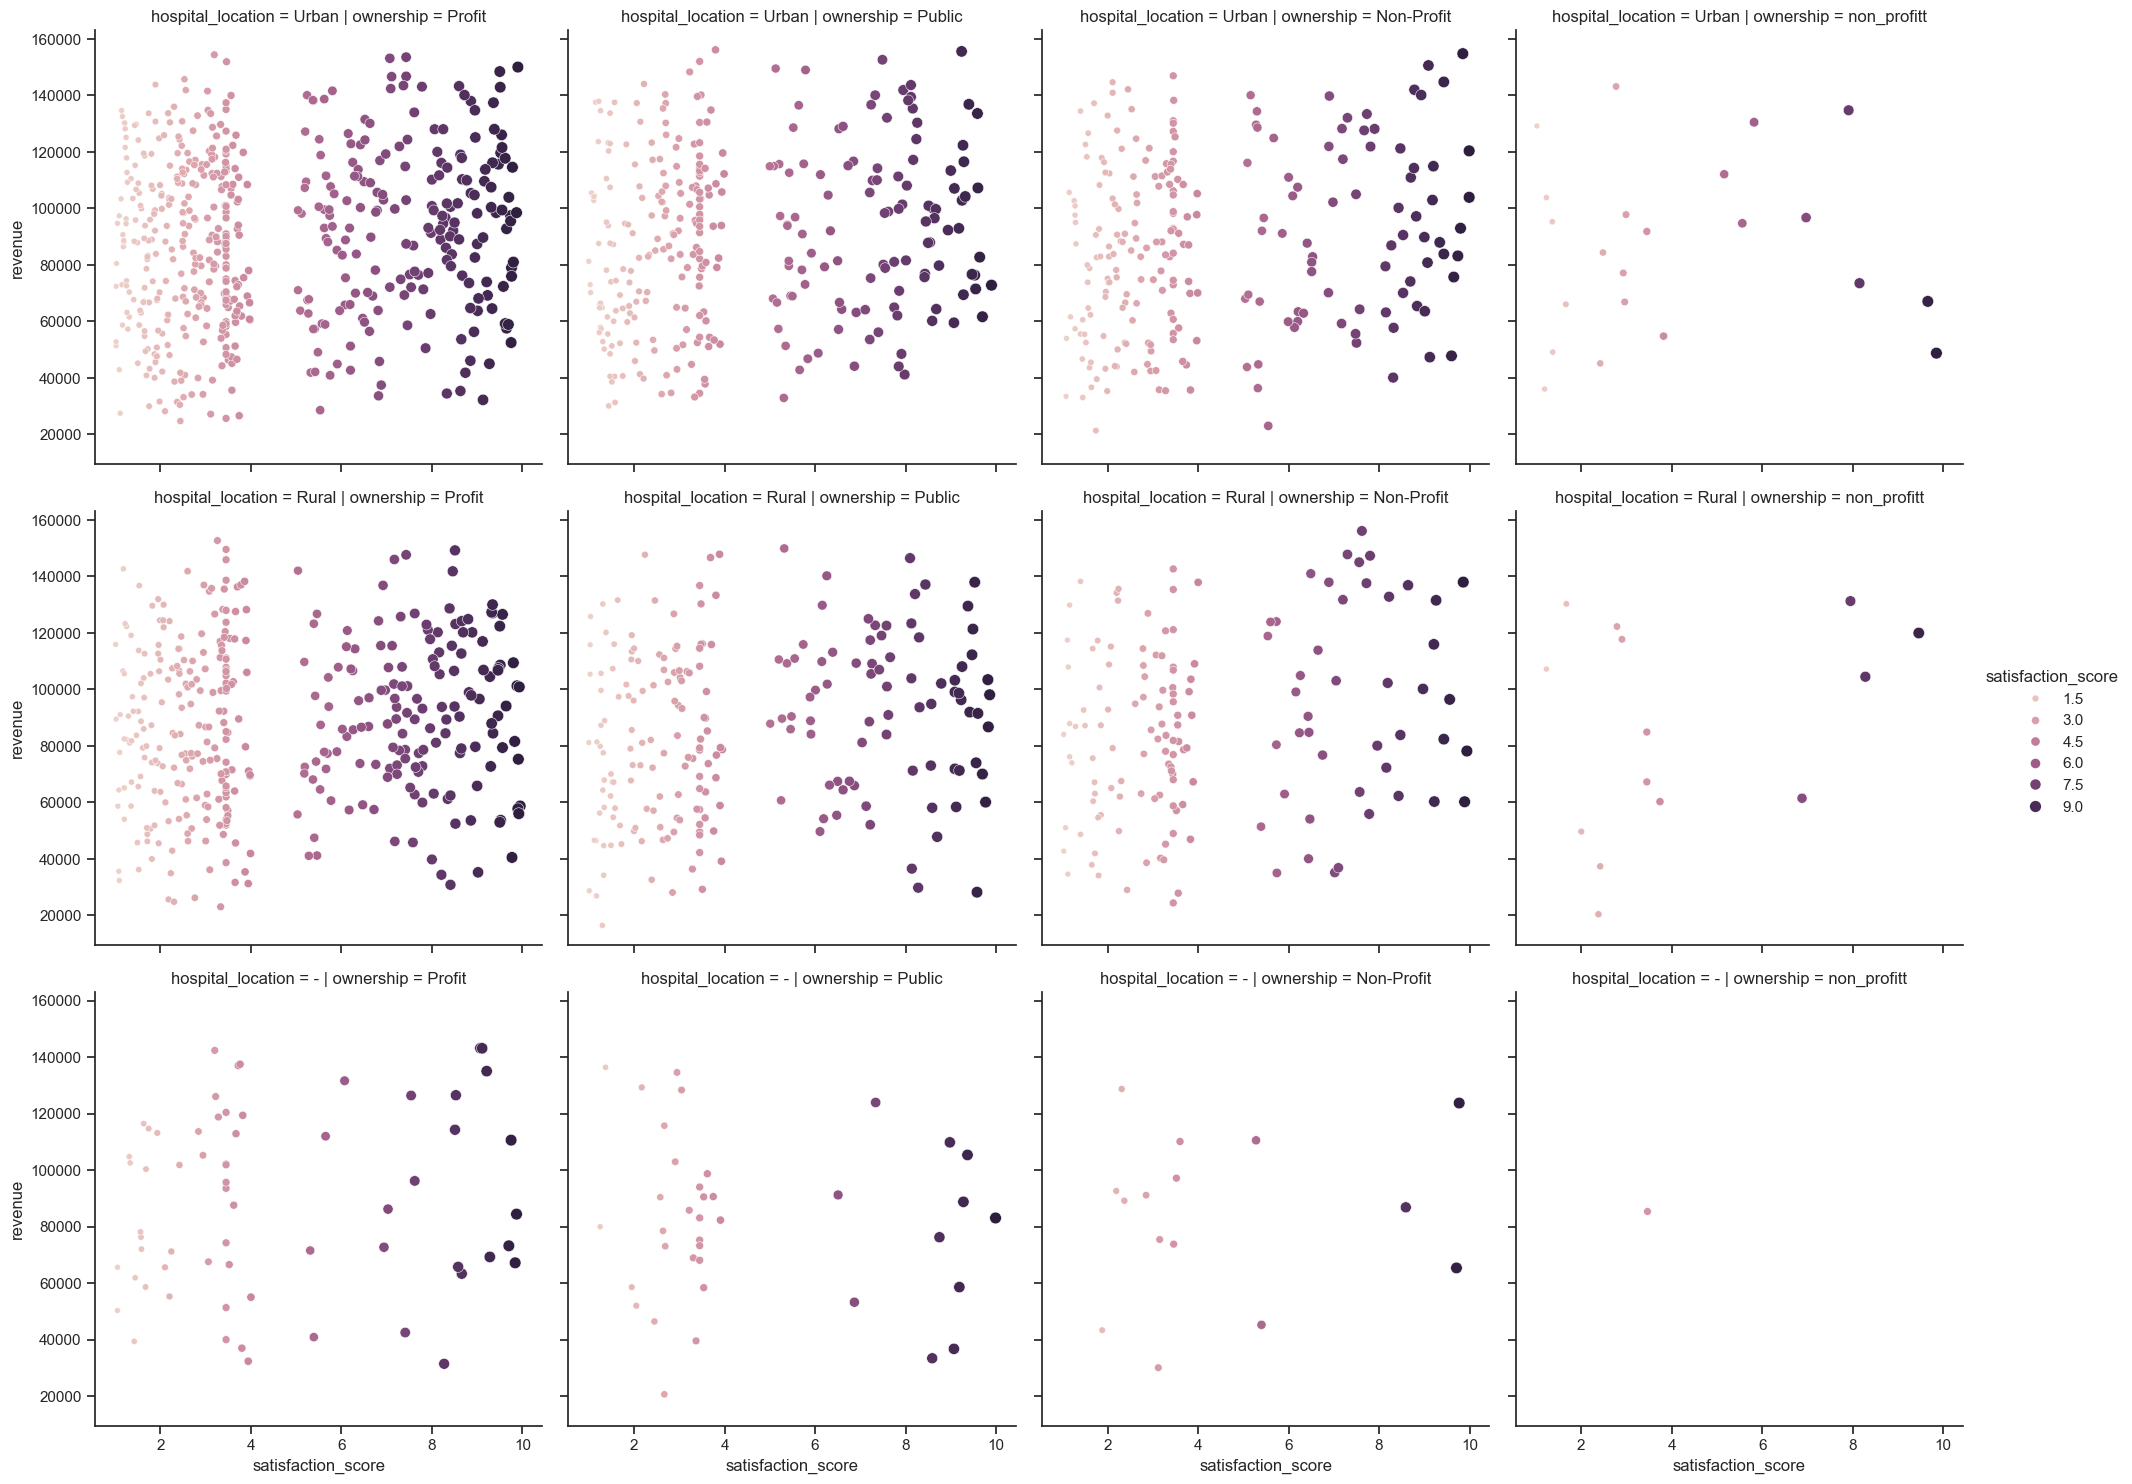

In [129]:
# Adjust further to add subplots based on family support
sns.relplot(x="satisfaction_score", y="revenue", 
            data=df,
            kind="scatter", 
            col="ownership",
            # col_order=["yes", "no"],
            row="hospital_location",
            hue="satisfaction_score",
            size="satisfaction_score")
# Show plot
plt.show()

In [130]:
df = df[df['hospital_location']== 'Urban']

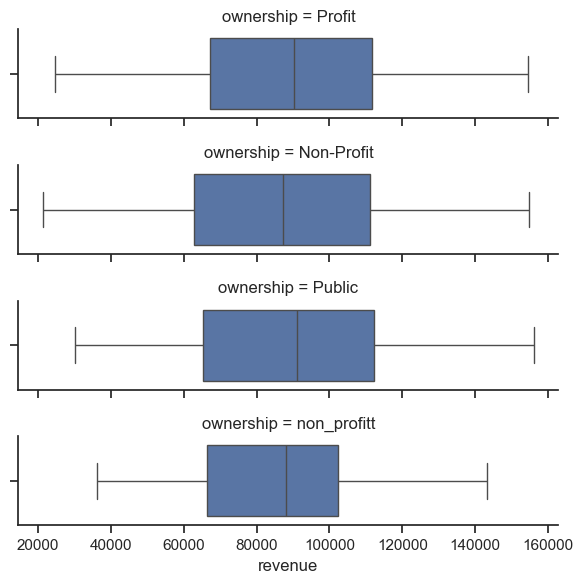

<Figure size 640x480 with 0 Axes>

In [131]:
##
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='revenue',
         kind='box',
         row='ownership',
         height=1.5, aspect=4,)

plt.show()
plt.clf()


In [132]:
# Correcting typos in ownership column i.e. non_profitt to Non-Profit
df['ownership']  = df['ownership'].replace({'non_profitt': 'Non-Profit'})

In [133]:
df.hospital_location.unique()

array(['Urban'], dtype=object)

In [134]:
# Filter out rows with hospital_location values other than Urban and Rural
df = df[df['hospital_location'].isin(['Urban', 'Rural'])]
string = df.select_dtypes('object').columns
df.groupby(string.to_list()).size()
# df.groupby('hospital_location').size()
# df.groupby('ownership').size()
# category = df.select_dtypes('object').columns

ownership   hospital_location
Non-Profit  Urban                250
Profit      Urban                528
Public      Urban                299
dtype: int64

In [135]:
df.clinic_id.nunique()

819

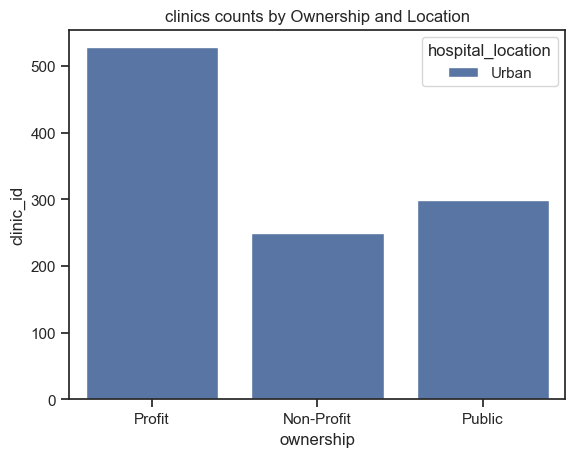

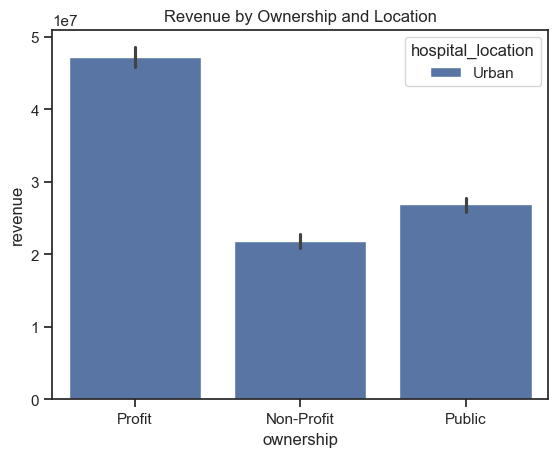

In [136]:


sns.barplot(x='ownership', y='clinic_id', hue='hospital_location', data=df, estimator=len).set(title='clinics counts by Ownership and Location')
plt.show()


sns.barplot(x='ownership', y='revenue', hue='hospital_location', data=df, estimator=sum).set(title='Revenue by Ownership and Location')
plt.show()


In [137]:
#validate any negative values in numeric variables
df.describe()

,clinic_id,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,975.637883,25.168059,0.502405,24.826370,4.365896,89041.312683
std,576.364585,14.013356,0.288851,14.108269,2.614543,29744.430121
min,0.000000,1.000000,0.000000,1.000000,1.000000,21341.290000
25%,473.000000,13.000000,0.250000,12.000000,2.290000,65832.200000
50%,951.000000,25.000000,0.500000,24.000000,3.450000,89428.370000
75%,1453.000000,38.000000,0.750000,38.000000,6.510000,111538.680000
max,1987.000000,49.000000,1.000000,49.000000,9.990000,156115.420000


<function matplotlib.pyplot.show(close=None, block=None)>

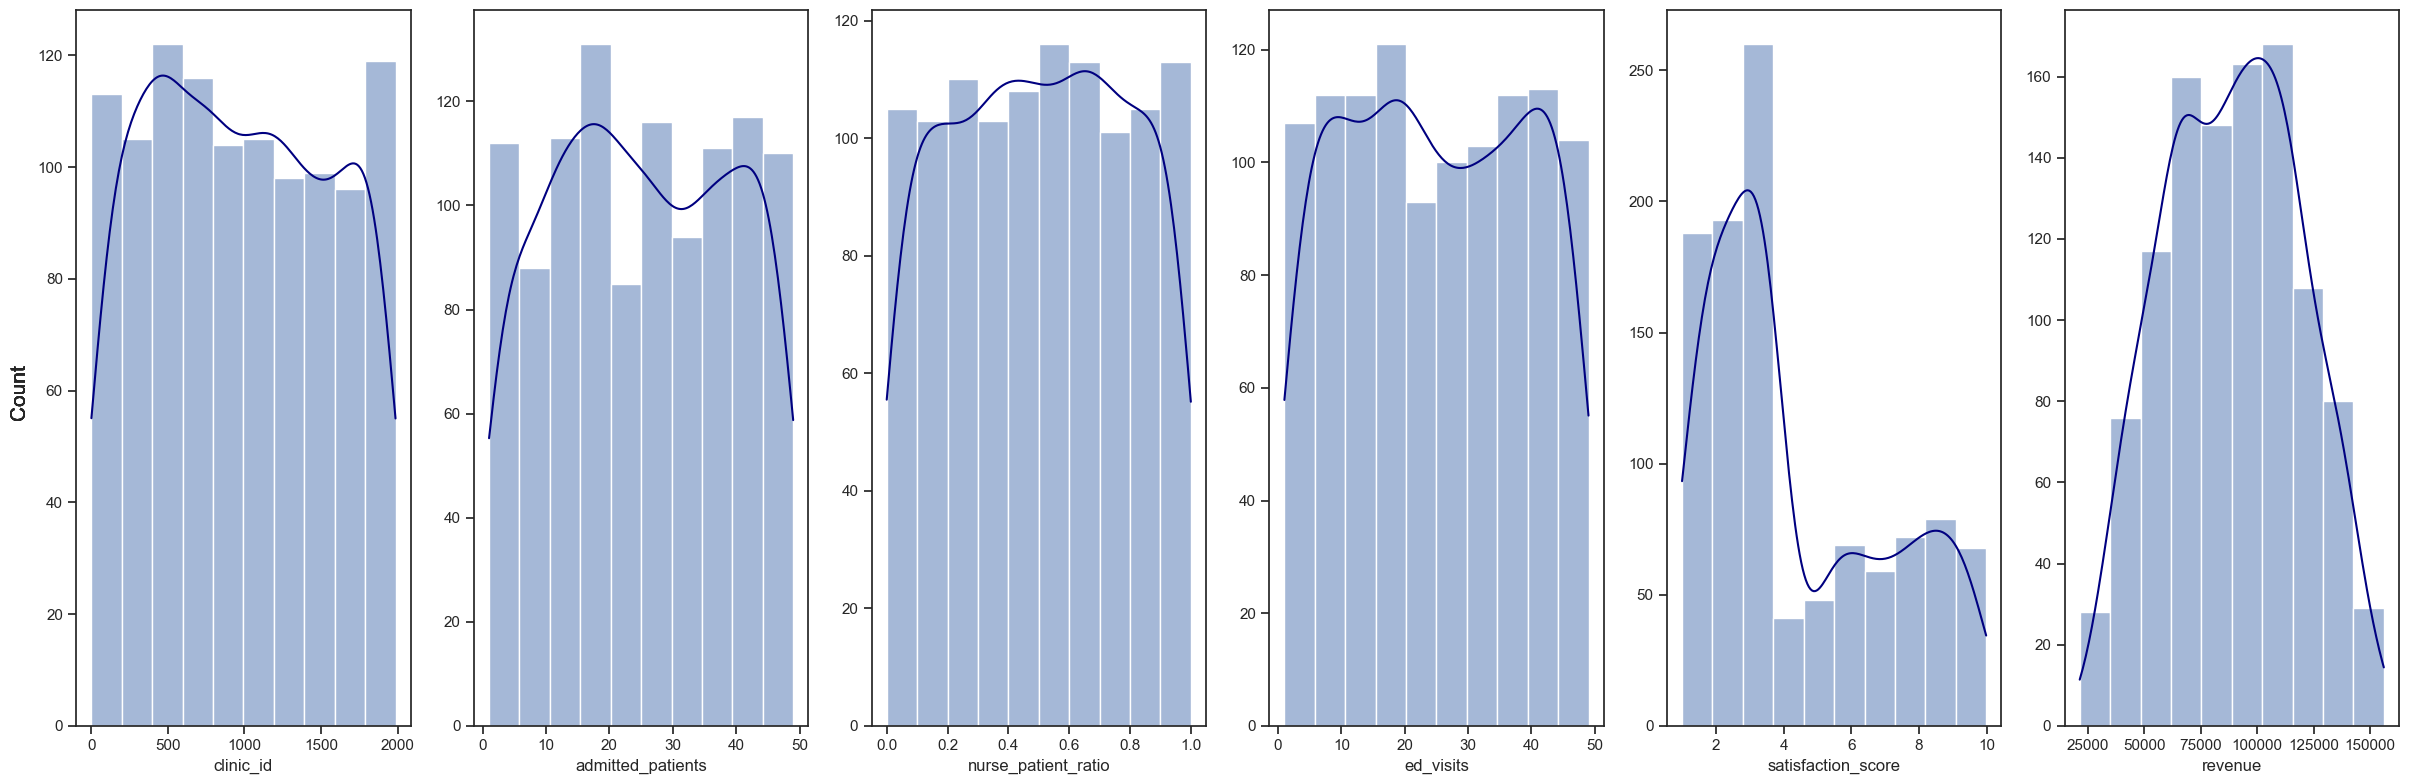

In [138]:
# EDA for numeric variables
numeric = df.select_dtypes('number').columns
fig, axes = plt.subplots(1,6,figsize=(24,8))
axes = axes.flatten() # To create a mapping from multidimensional axes objects to one dimensional. If I explain this, I also have to explain to fig and axes objects above (which is different from the simple plotting procedure taught in the lecture), then I also have to explain object oriented programming in Python. I assume readers (graders) understand it
for i, value in enumerate(numeric):
    ax = sns.histplot(x=df[value], ax=axes[i], bins=10, kde=True)
    ax.set_ylabel(None)
    ax.lines[0].set_color('navy')
    fig.text(0.0,0.5,'Count',rotation='vertical',horizontalalignment='center',verticalalignment='center',fontsize = 15)

plt.tight_layout()
plt.show


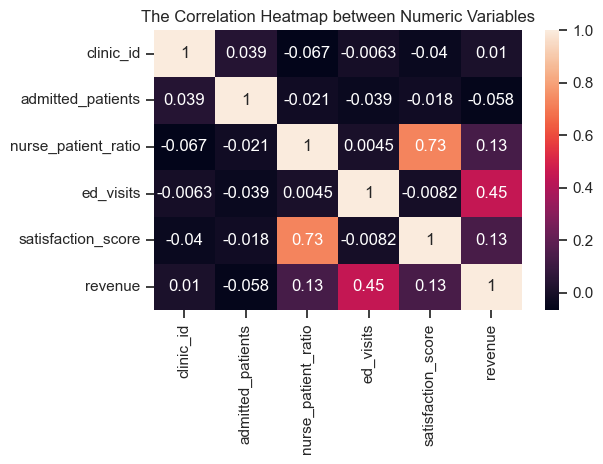

                     clinic_id  admitted_patients  nurse_patient_ratio  \
clinic_id             1.000000           0.039257            -0.067308   
admitted_patients     0.039257           1.000000            -0.020847   
nurse_patient_ratio  -0.067308          -0.020847             1.000000   
ed_visits            -0.006285          -0.039480             0.004550   
satisfaction_score   -0.040232          -0.018092             0.727073   
revenue               0.010436          -0.058007             0.130964   

                     ed_visits  satisfaction_score   revenue  
clinic_id            -0.006285           -0.040232  0.010436  
admitted_patients    -0.039480           -0.018092 -0.058007  
nurse_patient_ratio   0.004550            0.727073  0.130964  
ed_visits             1.000000           -0.008201  0.449085  
satisfaction_score   -0.008201            1.000000  0.132903  
revenue               0.449085            0.132903  1.000000  


In [139]:

# This is a heatmap showing correlations among numeric variables. This is a fundamental step in preprocessing, as it prepares for correlation analysis such as principal component analysis (PCA). Decorrelation is also an important part in feature engineering. I don't implement it here, because it is also time consuming.
corr = df[numeric].corr()
sns.heatmap(corr,annot=True).set(title='The Correlation Heatmap between Numeric Variables')
plt.tight_layout()

plt.show()
print(corr)

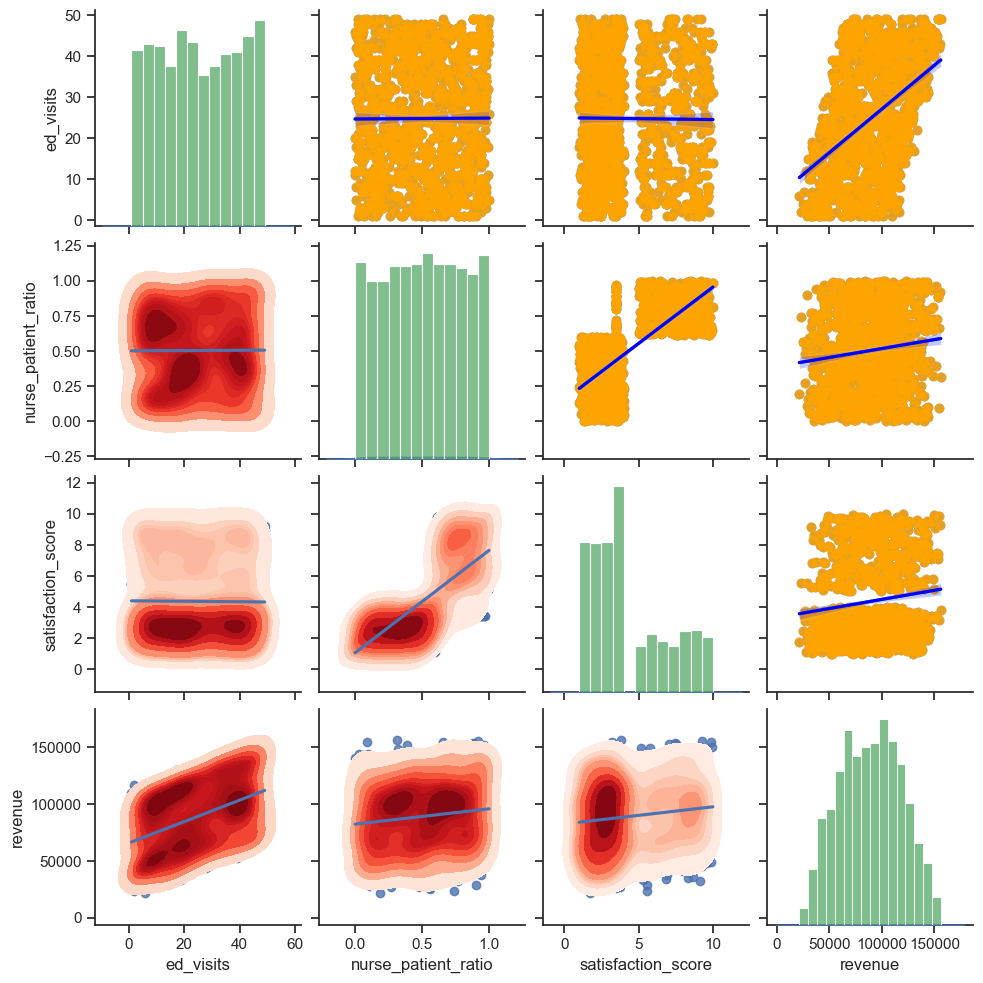

In [140]:
g = sns.pairplot(df[['ed_visits','nurse_patient_ratio','satisfaction_score','revenue']],kind='reg',diag_kind='kde')
g.map_diag(sns.histplot, color="g")
g.map_upper(sns.regplot, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
g.map_lower(sns.kdeplot, cmap="Reds", fill=True)
# Show the plot
plt.show()

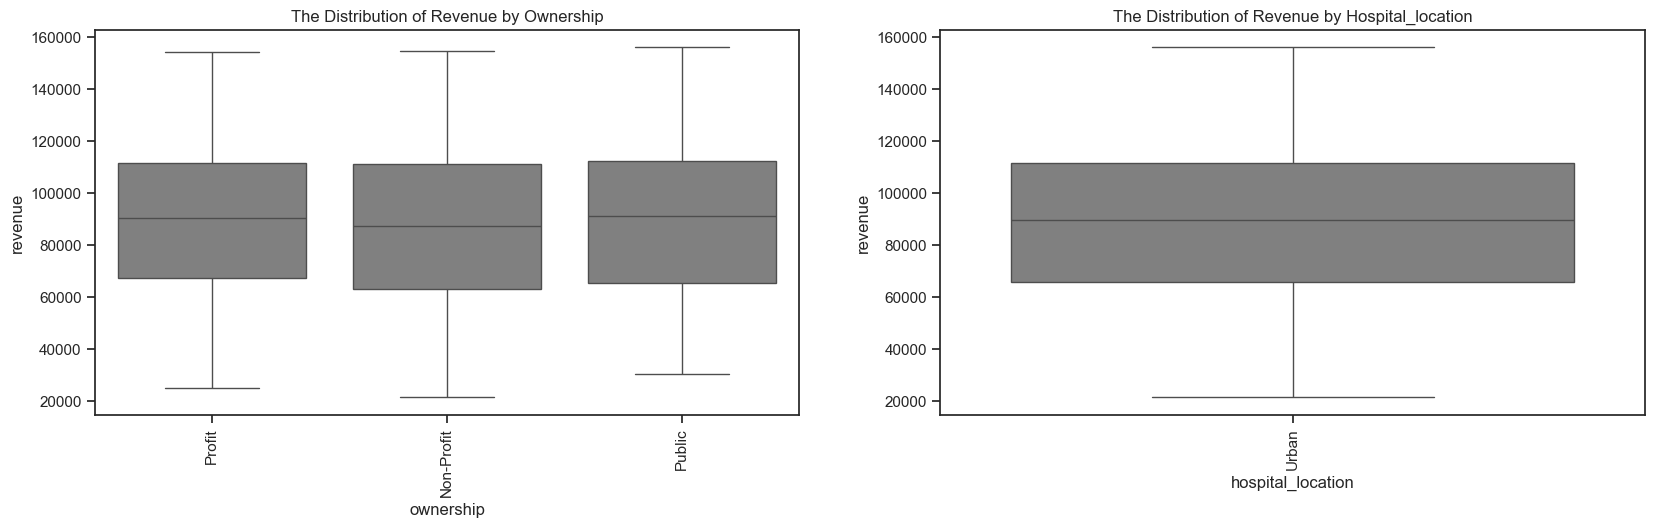

In [141]:
fig, axes = plt.subplots(1, len(strings), figsize=(20,5))

for i, var in enumerate(strings):
    sns.boxplot(data=df, x=var, y='revenue', color='gray', ax=axes[i]).set(title=f'The Distribution of Revenue by {var.capitalize()}')
    plt.sca(axes[i])
    plt.xticks(rotation=90)
    
plt.show()

In [142]:
df_eda=df.copy()

In [143]:
labelencoder = LabelEncoder()
df['hospital_location'] = labelencoder.fit_transform(df['hospital_location'])
df['ownership'] = labelencoder.fit_transform(df['ownership'])

In [162]:
df.columns

Index(['clinic_id', 'ownership', 'hospital_location', 'admitted_patients',
       'nurse_patient_ratio', 'ed_visits', 'satisfaction_score', 'revenue'],
      dtype='object')

In [166]:

X = df.drop(['revenue'], axis=1)
feature_cols = X.columns

y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=123)

# # split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# create a dictionary of models to test
models = {"Random Forest": RandomForestRegressor(),
          "LinearRegression" : LinearRegression(),
        #   "KNN": KNeighborsRegressor(), 
        #   "Ridge": Ridge(), 
        #   "Lasso": Lasso(), 
        #   "SVM": SVR(), 
        #   "Decision Tree": DecisionTreeRegressor(random_state= 123)
        }

rmse_results = []
predictions = []
for model in models.values():
    '''I iteratively fit the model and generates predictions. Here I first fit the model and store the first results. Then I do a cross validation to display distribution of model performance.'''
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    
    kf = KFold(n_splits = 10, random_state= 123, shuffle = True)
    cv_results = - cross_val_score(model,X_train,y_train,cv = kf,scoring = 'neg_mean_squared_error')
    cv_results_root = np.sqrt(cv_results)
    rmse_results.append(cv_results_root)
    
# train each model and get the performance metrics
for name, model in models.items():
    # train the model
    model.fit(X_train_scaled, y_train)
    # predict on the test set
    y_pred = model.predict(X_test_scaled)
    # calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # print the results
    print(name + " test results:")
    print("RMSE = ", rmse)
    print("R^2 = ", r2)
    print("\n")

Random Forest test results:
RMSE =  34758.8459244585
R^2 =  -0.3520918927118024


LinearRegression test results:
RMSE =  29831.136081728528
R^2 =  0.004101453845581582


KNN test results:
RMSE =  34128.07626803757
R^2 =  -0.3034642646419359


Ridge test results:
RMSE =  29831.012312928007
R^2 =  0.004109717755642062


Lasso test results:
RMSE =  29831.260485801606
R^2 =  0.004093147484502291


SVM test results:
RMSE =  30070.68167744547
R^2 =  -0.011956999110038113


Decision Tree test results:
RMSE =  42144.93400243384
R^2 =  -0.9877706235593391




In [145]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import GradientBoostingRegressor
# Train the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict on the test data and calculate the mean squared error
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)

print("Gradient Boosting Mean Squared Error:", gb_mse)

Gradient Boosting Mean Squared Error: 810077462.5903213


<function matplotlib.pyplot.show(close=None, block=None)>

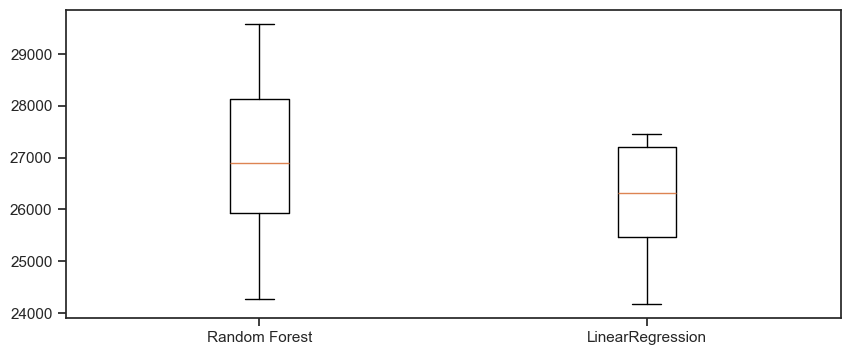

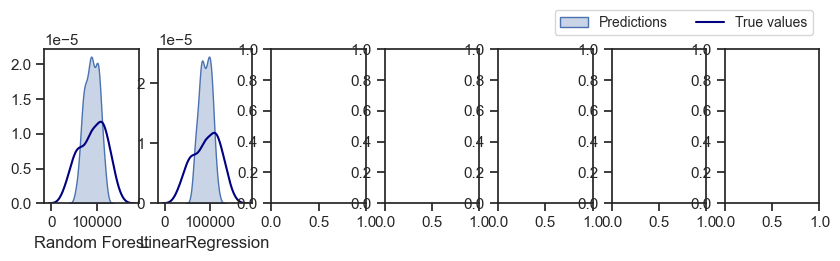

In [146]:

fig,ax = plt.subplots(figsize = (10,4))
ax.boxplot(rmse_results, labels = models.keys())

fig2,axes = plt.subplots(1,7,figsize = (10,2))
for i, model_name in enumerate(models.keys()):
    ax = sns.kdeplot(predictions[i],ax = axes[i],fill = True, alpha = 0.3,label = 'Predictions')
    ax = sns.kdeplot(y_test,linewidth = 1.5, ax = axes[i], color = 'navy',label = 'True values')
    ax.set_ylabel(None)
    ax.set_xlabel(model_name)
# axes[2].set_ylim([0,1.2])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, fontsize=10,ncols = 2, loc='upper right',bbox_to_anchor=(1,1.3))
plt.show

In [147]:
# train_score = []
# test_score = []
# max_score = 0
# max_pair = (0,0)

# for i in range(1,50):
#     tree = DecisionTreeRegressor(max_depth=i,random_state=42)
#     tree.fit(X_train,y_train)
#     y_pred = tree.predict(X_test)
#     train_score.append(tree.score(X_train,y_train))
#     test_score.append(r2_score(y_test,y_pred))
#     test_pair = (i,r2_score(y_test,y_pred))
#     if test_pair[1] > max_pair[1]:
#         max_pair = test_pair

# fig, ax = plt.subplots()
# ax.plot(np.arange(1,50), train_score, label = "Training R^2",color='lightcoral')
# ax.plot(np.arange(1,50), test_score, label = "Testing R^2",color='lime')
# print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

In [148]:
labelencoder = LabelEncoder()
df = df_eda.copy()
df['hospital_location'] = labelencoder.fit_transform(df['hospital_location'])
df['ownership'] = labelencoder.fit_transform(df['ownership'])


In [149]:
# df['revenue'] = np.log(df['revenue'])

In [150]:
df.describe()

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1077.000000,1077.000000,1077.0,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,975.637883,1.045497,0.0,25.168059,0.502405,24.826370,4.365896,89041.312683
std,576.364585,0.712847,0.0,14.013356,0.288851,14.108269,2.614543,29744.430121
min,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,21341.290000
25%,473.000000,1.000000,0.0,13.000000,0.250000,12.000000,2.290000,65832.200000
50%,951.000000,1.000000,0.0,25.000000,0.500000,24.000000,3.450000,89428.370000
75%,1453.000000,2.000000,0.0,38.000000,0.750000,38.000000,6.510000,111538.680000
max,1987.000000,2.000000,0.0,49.000000,1.000000,49.000000,9.990000,156115.420000


In [151]:
X = df.iloc[:,:-1] # Features
feature_cols = X.columns
y = df.iloc[:,-1] # Target variable

In [152]:
# define the scaler 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
# fit and transform the train set
X[['nurse_patient_ratio']] = scaler.fit_transform(X[['nurse_patient_ratio']])
X[['satisfaction_score']] = scaler.fit_transform(X[['satisfaction_score']])

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Linear Regression r2_score: ',r2_score(y_test,y_pred))
print('Linear Regression Root Mean Squared Error: ',np.sqrt(mean_squared_error((y_test),(y_pred))))

Linear Regression r2_score:  0.20481050119919875
Linear Regression Root Mean Squared Error:  26436.960006664398


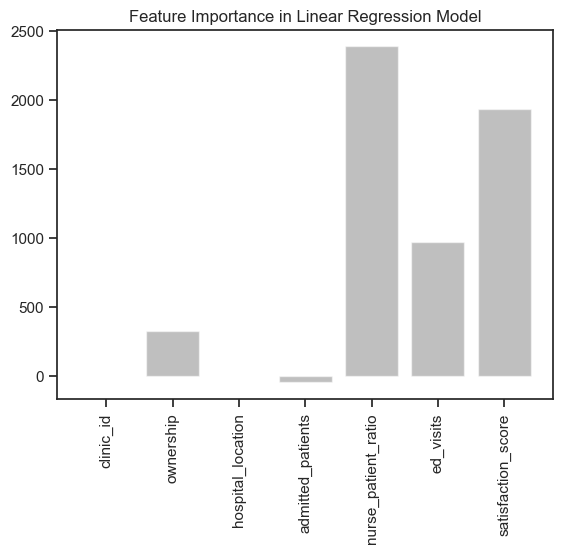

In [155]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lr.coef_[i]
    
plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5,color='gray')
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model');

In [156]:
tree = DecisionTreeRegressor(max_depth=12,min_samples_split=2,random_state=42)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)
d_r2 = tree.score(X_test, y_test)
print("Decision Tree Regressor R-squared: {}".format(d_r2))

d_mse = mean_squared_error((y_pred2), (y_test))
d_rmse = np.sqrt(d_mse)
print("Decision Tree Regressor RMSE: {}".format(d_rmse))

Decision Tree Regressor R-squared: -0.4423743278069776
Decision Tree Regressor RMSE: 35605.34415476569


Text(0.5, 1.0, 'Feature Importance in Decision Tree Regression Model')

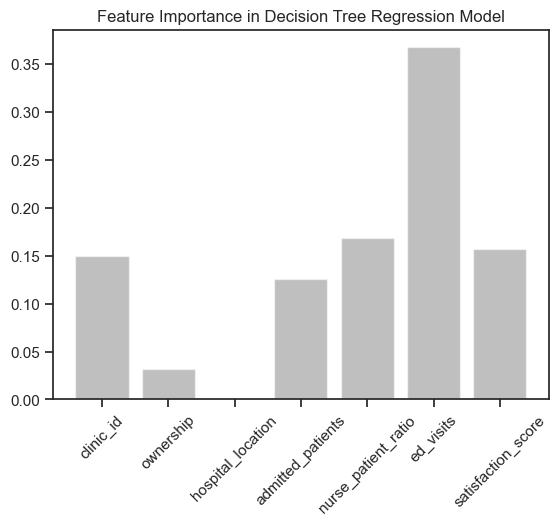

In [157]:
importance = tree.feature_importances_
new_column_names=['Year','Transmission', 'Fuel Type','Engine Size','Tax','Model','Mileage']
f_importance = {}
for i in range(len(feature_cols)):
     f_importance[feature_cols[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values(),alpha=0.5,color='gray')
plt.xticks(rotation=45)
plt.title('Feature Importance in Decision Tree Regression Model')

In [158]:
precession_range = 0.15

In [159]:
X_test['Predicted_price'] = np.round((y_pred),0)
X_test['Price'] = np.round((y_test),0)
lr_e = X_test
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
within_10pct = len([d for d in lr_e['Diff'] if abs(d) <= precession_range])
pct_lr = within_10pct/len(lr_e['Diff'])       
print(f'Percentage of predictions within +/- {int(precession_range*100)}% range: {pct_lr}')

Percentage of predictions within +/- 15% range: 0.2993827160493827


Text(0, 0.5, 'Count')

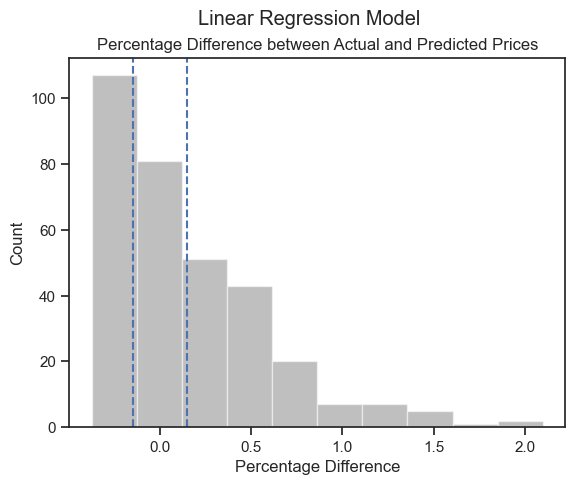

In [160]:
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
plt.hist(lr_e['Diff'], bins=10, color='gray',alpha=0.5)
plt.axvline(x=precession_range, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-precession_range, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Linear Regression Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count')

In [161]:
da = [pct_lr,pct_tree]
labels =['Linear Regression Model','Decision Tree Model']
plt.bar(labels, da,color='gray', alpha=0.5)


# Add labels to the chart
plt.title('Linear Regress Model v.s Decision Tree Model')
plt.xlabel('Model')
plt.ylabel('Proportion of predictions within 10%')

# Show the chart
plt.show()

NameError: name 'pct_tree' is not defined